## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [1]:
import pandas as pd

In [2]:
results = pd.read_csv('../4_02-lab-classification_model_evaluation/chronic_kidney_disease_full.csv')
results.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer: Age, Blood Pressure and Hypertension

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [3]:
results.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

In [4]:
results.dropna()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Answer: 158 rows will remain in our dataframe from the initial 400 rows. The 2 downsides of doing this is that if too many rows are dropped, it reduces the statistical power. Alot of datas are not usable and the estimates might be biased. If too much data are dropped, we will need the hospital to collect more data

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: The patients may not go through all the tests to get all the data as the cost of checkup can be quite costly. They will only go the for tests that are required for their individual condition. Some of the doctors and nurses could be new professionals and might read some data wrongly and wrote wrongly. Some patients may not be cooperative and therefore some data could not be collected.

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: For every person with or without CKD, we will tell them that they have CKD. 

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We optimized True Positive. We minimized false positive because there isn't anyone who have CKD but we predicted wrongly.

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: The disadvantage is to predict those who do not have CKD as having CKD and this will bring down the confidence in our predictive model. People who was told that they have CKD will have a shock of their life and angry after knowing they actually do not have CKD.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: For every person with or without CKD, we will tell them that they do not have CKD.

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We optimized True Negative. We minimized false negative because there isn't anyone who do not have CKD but we predicted wrongly.

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: The disadvantage is to predict those who have CKD as not having CKD and this will bring down the confidence in our predictive model. People who was told that they do not have CKD but in actual fact they do have CKD, will cost those people their lives.

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
results.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


In [8]:
results['sg'] = results.sg.astype(str)
results['al'] = results.al.astype(str)
results['su'] = results.su.astype(str)

In [9]:
num_col = results._get_numeric_data().columns

In [10]:
num_col = list(num_col)

In [11]:
cat_col = list(set(results) - set(num_col))

In [12]:
num_col

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

In [13]:
cat_col

['rbc',
 'pc',
 'htn',
 'al',
 'appet',
 'class',
 'dm',
 'pe',
 'pcc',
 'ba',
 'ane',
 'sg',
 'cad',
 'su']

In [14]:
results.isnull().sum()

age        9
bp        12
sg         0
al         0
su         0
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [15]:
results[num_col]

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [16]:
for i in results[num_col]:
    results[i] = results[i].fillna(results[i].mean())

In [17]:
results.drop(['rbc','pc'],axis=1,inplace=True)

In [18]:
results.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pcc      4
ba       4
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      2
dm       2
cad      2
appet    1
pe       1
ane      1
class    0
dtype: int64

In [19]:
results.dropna(inplace=True)

In [20]:
cat_col = [col for col in cat_col if col!=('pc')]

In [21]:
cat_col  = [col for col in cat_col if col!=('rbc')]

In [22]:
for i in results[cat_col]:
    results[i] = pd.get_dummies(results[i])

In [23]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt

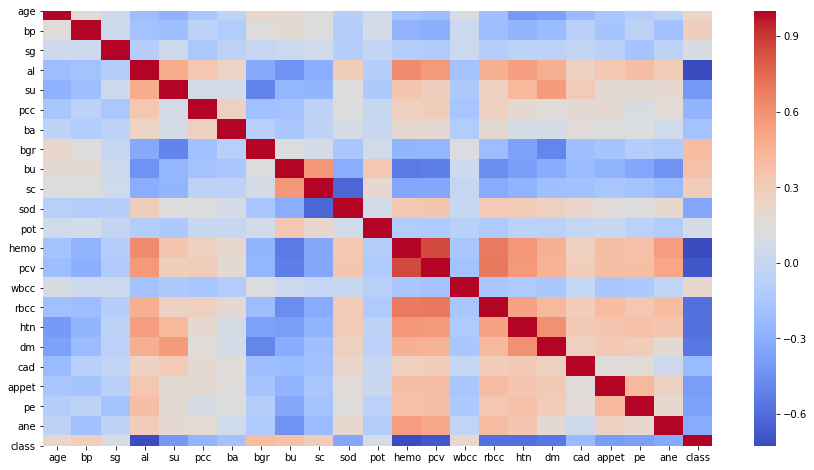

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(results.corr(),cmap='coolwarm');

In [26]:
corr = abs(results.corr()['class']).sort_values(ascending=False)

In [27]:
corr

class    1.000000
hemo     0.726616
al       0.720927
pcv      0.685938
htn      0.584641
rbcc     0.581948
dm       0.553272
su       0.412618
bgr      0.394751
appet    0.388351
pe       0.370318
bu       0.367252
sod      0.341292
ane      0.321034
sc       0.289354
bp       0.279804
pcc      0.261619
cad      0.232750
age      0.227435
wbcc     0.208341
ba       0.184171
sg       0.101848
pot      0.078005
Name: class, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
logr = LogisticRegression()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()

In [32]:
X = results[['hemo','al','pcv','htn','rbcc','dm','su','bgr','appet','pe','bu','sod','ane']]

In [33]:
y = results['class']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train_ss = ss.fit_transform(X_train)

In [36]:
X_test_ss = ss.transform(X_test)

In [37]:
import statsmodels.api as sm

In [38]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
ols = model.fit()
ols.summary()

C:\Users\Willy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  class   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     69.58
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           7.71e-92
Time:                        14:12:44   Log-Likelihood:                -30.406
No. Observations:                 393   AIC:                             88.81
Df Residuals:                     379   BIC:                             144.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3996      0.241      9.943      0.000       1.925       2.874
hemo          -0.0550      0.011     -5.113      0.000      -0.076      -0.034
al            -0.3515      0.039     -9.016      0.000      -0.428      -0.275
pcv           -0.0079      0.003     -2.289      0.023      -0.015      -0.001
htn           -0.0370      0.040     -0.916      0.360      -0.116       0.042
rbcc          -0.0408      0.024     -1.698      0.090      -0.088       0.006
dm            -0.1120      0.042     -2.697      0.007      -0.194      -0.030
su             0.0259      0.040      0.643      0.520      -0.053       0.105
bgr            0.0006      0.000      2.748      0.006       0.000       0.001
appet         -0.0481      0.039     -1.244      0.214      -0.124       0.028
pe            -0.0143      0.040     -0.355      0.723      -0.094       0.065
bu            -0.0011      0.000     -3.333      0.001      -0.002      -0.000
sod           -0.0028      0.002     -1.750      0.081      -0.006       0.000
ane            0.0929      0.047      1.985      0.048       0.001       0.185
==============================================================================
Omnibus:                       29.633   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.941
Skew:                           0.730   Prob(JB):                     2.59e-08
Kurtosis:                       2.999   Cond. No.                     3.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X = results[['hemo','al','pcv','dm','bgr','bu']]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
#X_train_ss = ss.fit_transform(X_train)

In [42]:
#X_test_ss = ss.transform(X_test)

In [43]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
ols = model.fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  class   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     145.1
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.07e-95
Time:                        14:12:44   Log-Likelihood:                -38.178
No. Observations:                 393   AIC:                             90.36
Df Residuals:                     386   BIC:                             118.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9852      0.106     18.674      0.000       1.776       2.194
hemo          -0.0542      0.010     -5.235      0.000      -0.075      -0.034
al            -0.3672      0.037     -9.998      0.000      -0.439      -0.295
pcv           -0.0107      0.003     -3.275      0.001      -0.017      -0.004
dm            -0.1457      0.037     -3.981      0.000      -0.218      -0.074
bgr            0.0005      0.000      2.594      0.010       0.000       0.001
bu            -0.0011      0.000     -3.350      0.001      -0.002      -0.000
==============================================================================
Omnibus:                       28.398   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.294
Skew:                           0.712   Prob(JB):                     5.89e-08
Kurtosis:                       2.945   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
logr.fit(X_train,y_train)

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
#logr.fit(X_train_ss,y_train)

In [46]:
predict = logr.predict(X_test)

In [47]:
logr.score(X_train,y_train)

0.9394904458598726

In [48]:
logr.score(X_test,y_test)

0.8987341772151899

In [49]:
import numpy as np

In [50]:
np.exp(logr.coef_)

array([[0.62917747, 0.10495906, 0.93173992, 0.53750987, 1.06069546,
        1.03626958]])

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

Answer: The coefficient of one of my quantitative feature,'bgr', is 1.06069546

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

Answer: The coefficient of one of my categorical feature,'dm', is 0.53750987

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer: In the real world scenario, business owner/stakeholder always want to know if a project will be either positive or negative. Therefore logistic regression can help to give that outcome for stakeholder to make a decision. The advantages are that logistic regression are very informative and easy to interpret compared to other classification. Logistic regression can also handle nonlinear effect.

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
matrix = confusion_matrix(y_test, predict)

In [53]:
matrix

array([[22,  0],
       [ 8, 49]], dtype=int64)

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: We want to optimize sensitivity because we have to correctly predict those patient who have CKD as having CKD so that we can reduce the chance of a patient having CKD being told of not having CKD. Another metric to optimize is accuracy, although predicting those patient having CKD as having CKD, we also don't want to tell patient that they have CKD when they do not have CKD. Not only that we want our True positive to be high, we don't want to increase our True negative as well, therefore we need to have high accuracy and sensitivity.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: If classes are unbalanced, the data collected may be biased towards one side. It will be ideal to have data that have balanced classes in order to have a more accurate prediction. The data for this analysis is still acceptable as the balance of the classes is about 40% against 60%, the biased level is not that strong in this case.

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: If there are 5 CKD patient and 5 non-CKD patient for our test. We can draw a fairer conclusion on a general trend based on the data collected such as age, blood pressure, diabetes, etc. If there are 2 CKD patient and 8 non-CKD patient for our test. The data collected from the 2 CKD patient may not accurately represent the general trend for CKD, therefore the prediction may be inaccurate as the model will predict more patient as non-CKD.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [54]:
import random

In [55]:
unbalanced_data = results.sample(n=200000,replace=True)

In [56]:
unbalanced_data['class']=1

In [57]:
unbalanced_data

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
151,76.0,90.0,0,0,0,1,1,172.000000,46.0,1.700000,...,30.000000,8406.122449,4.707435,0,0,1,1,1,0,1
243,62.0,90.0,0,0,0,1,1,169.000000,48.0,2.400000,...,47.000000,11000.000000,6.100000,0,1,1,1,1,1,1
383,80.0,80.0,0,1,1,1,1,119.000000,46.0,0.700000,...,49.000000,5100.000000,5.000000,1,1,1,1,1,1,1
216,64.0,70.0,0,1,1,1,1,107.000000,15.0,3.072454,...,38.000000,8406.122449,4.707435,1,1,1,1,1,1,1
22,48.0,80.0,0,0,1,1,1,95.000000,163.0,7.700000,...,32.000000,6900.000000,3.400000,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,41.0,80.0,0,0,0,1,1,210.000000,165.0,18.000000,...,38.884498,8406.122449,4.707435,1,0,1,1,1,1,1
249,56.0,90.0,0,0,0,0,1,176.000000,309.0,13.300000,...,9.000000,5400.000000,2.100000,0,0,1,0,0,0,1
87,70.0,100.0,1,0,1,0,1,169.000000,47.0,2.900000,...,32.000000,5800.000000,5.000000,0,0,1,0,1,1,1
122,34.0,70.0,0,0,0,1,1,148.036517,219.0,12.200000,...,38.884498,8406.122449,4.707435,0,1,1,1,1,0,1


In [58]:
frame = [results,unbalanced_data]

In [59]:
new_df = pd.concat(frame)

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [61]:
X = new_df[['hemo','al','pcv','dm','bgr','bu']]

In [62]:
y = new_df['class']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
ols = model.fit()
ols.summary()

C:\Users\Willy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  class   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.90
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           8.77e-35
Time:                        14:12:45   Log-Likelihood:             4.4176e+05
No. Observations:              200393   AIC:                        -8.835e+05
Df Residuals:                  200386   BIC:                        -8.834e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0019      0.000   2145.294      0.000       1.001       1.003
hemo          -0.0001   4.55e-05     -2.375      0.018      -0.000   -1.89e-05
al            -0.0007      0.000     -4.454      0.000      -0.001      -0.000
pcv        -2.019e-05   1.44e-05     -1.405      0.160   -4.84e-05    7.98e-06
dm            -0.0003      0.000     -1.768      0.077      -0.001    3.09e-05
bgr         1.076e-06   9.25e-07      1.163      0.245   -7.37e-07    2.89e-06
bu         -2.187e-06   1.47e-06     -1.485      0.138   -5.07e-06    6.99e-07
==============================================================================
Omnibus:                   562831.633   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16270449454.360
Skew:                         -37.346   Prob(JB):                         0.00
Kurtosis:                    1396.932   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
logr.fit(X_train,y_train)

C:\Users\Willy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predict = logr.predict(X_test)

In [67]:
logr.score(X_train,y_train)

0.9993450353680902

In [68]:
logr.score(X_test,y_test)

0.9990518725517104

In [69]:
np.exp(logr.coef_)

array([[1.00026091, 0.27737854, 0.99889653, 0.63964415, 1.02047354,
        1.0122359 ]])

In [70]:
matrix2 = confusion_matrix(y_test, predict)

In [71]:
matrix2

array([[    0,    38],
       [    0, 40041]], dtype=int64)

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!